In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

## Combinatorial Laplacian with random graphs

ER graph

least eigenvalue: (ComplexF64[-0.06601574005976886 - 0.07511272904884707im, -0.06601574007483899 - 0.07511272904319048im, -0.06601574005696033 - 0.07511272904780275im, -0.06601574005417793 - 0.07511272904765409im, -0.06601574005356574 - 0.07511272904792139im, -0.0660157400525248 - 0.07511272904719725im, -0.06601574005442525 - 0.07511272904483607im, -0.06601574005670119 - 0.07511272904501884im, -0.06601574005777339 - 0.07511272904525738im, -0.06601574005726833 - 0.0751127290450929im, -0.06601574005086593 - 0.07511272904770831im, -0.06601574005620311 - 0.07511272904720798im, -0.06601574005977125 - 0.0751127290458271im, -0.06601574005520021 - 0.07511272904625607im, -0.06601574005446452 - 0.07511272904671122im, -0.06601574005288513 - 0.07511272904651946im, -0.06601574005545563 - 0.07511272904850402im, -0.06601574005796221 - 0.07511272904452193im, -0.06601574005597073 - 0.07511272904912791im, -0.06601574005630392 - 0.07511272904819291im, -0.06601574005567329 - 0.07511272904927202im, -0.0660

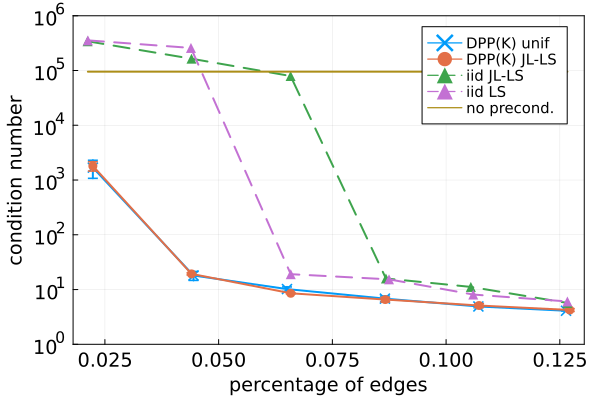

-0.06601574005789755 - 0.07511272904993432im, -0.06601574005632777 - 0.07511272904871912im, -0.06601574005707868 - 0.07511272904544862im, -0.06601574005248811 - 0.07511272905117544im, -0.06601574005077762 - 0.07511272905069663im, -0.06601574005977633 - 0.07511272905162356im, -0.06601574005793329 - 0.07511272904776872im, -0.06601574005341665 - 0.07511272904870622im, -0.06601574005742736 - 0.07511272904869956im, -0.06601574005436767 - 0.0751127290438979im, -0.06601574005584812 - 0.07511272904665628im, -0.0660157400555001 - 0.07511272904779698im, -0.06601574005389042 - 0.07511272904978462im, -0.06601574005290571 - 0.07511272904790597im, -0.06601574005417613 - 0.07511272904639689im, -0.06601574005366975 - 0.0751127290461753im, -0.06601574005214882 - 0.07511272904871637im, -0.06601574005134485 - 0.07511272904695616im, -0.06601574005697035 - 0.07511272904873664im, -0.06601574005530794 - 0.07511272904553952im, -0.06601574005585069 - 0.07511272904566688im, -0.06601574005758898 - 0.075112729046

In [17]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


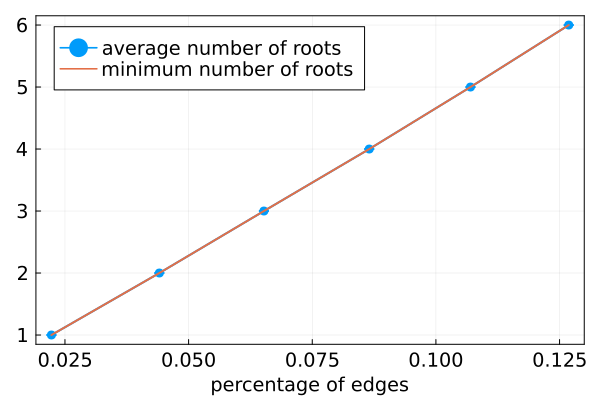

In [22]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

 SBM graph

least eigenvalue: (ComplexF64[0.024952134604441595 + 0.025122827862485222im, 0.024952252865307913 + 0.025122657556759895im, 0.024952200621333923 + 0.025122732792663215im, 0.02495219722457367 + 0.025122737684302735im, 0.02495216264618296 + 0.025122787479990673im, 0.024952203683780247 + 0.0251227283824932im, 0.02495214150631792 + 0.0251228179231722im, 0.02495213510380395 + 0.025122827143367162im, 0.024952168343642916 + 0.025122779275230878im, 0.024952140230461568 + 0.025122819760545662im, 0.02495217520123136 + 0.02512276939974767im, 0.02495220545156731 + 0.025122725836717298im, 0.024952139837465987 + 0.025122820326452997im, 0.024952170734417477 + 0.02512277583234318im, 0.024952216500644872 + 0.025122709925058936im, 0.02495219712676801 + 0.025122737825118115im, 0.024952160383759928 + 0.025122790738123967im, 0.024952225402734816 + 0.02512269710533458im, 0.024952170023971706 + 0.025122776855420782im, 0.024952193240410706 + 0.02512274342172971im, 0.02495222829247128 + 0.025122692943872506im,

, 0.024952176030314452 + 0.02512276820577068im, 0.024952141778691466 + 0.025122817530947614im, 0.024952176200225124 + 0.025122767961062675im, 0.024952138528831255 + 0.025122822210995304im, 0.024952108162424286 + 0.025122865941127916im, 0.024952143729970965 + 0.02512281472098351im, 0.024952203179580912 + 0.025122729108592853im, 0.0249522626890741 + 0.02512264340994381im, 0.024952159541885736 + 0.025122791950471013im, 0.024952167869857347 + 0.025122779957492392im, 0.024952106683223875 + 0.02512286807136122im, 0.0249522115918089 + 0.02512271699430313im, 0.024952115011322645 + 0.02512285607822183im, 0.024952160291758597 + 0.025122790870546124im, 0.024952174623144984 + 0.025122770232188795im, 0.0249521316331527 + 0.025122832141339074im, 0.024952163456846102 + 0.02512278631265809im, 0.02495214198327672 + 0.025122817236390434im, 0.024952130881024583 + 0.025122833224474207im, 0.024952140970778986 + 0.025122818694449617im, 0.024952137145066645 + 0.02512282420378672im, 0.02495210584397161 + 0.02

0.025122875081547955im, 0.02495214162417765 + 0.02512281775345972im, 0.02495210668895353 + 0.025122868063126552im, 0.024952167496623368 + 0.025122780494969795im, 0.024952198521635126 + 0.025122735816408347im, 0.02495216492617177 + 0.02512278419665727im, 0.024952174629784225 + 0.025122770222663494im, 0.024952108056665433 + 0.02512286609346778im, 0.02495210246108261 + 0.025122874151601388im, 0.024952209387024287 + 0.025122720169322692im, 0.02495222367420605 + 0.02512269959460133im, 0.025305117487474726 + 0.024614503077560152im, 0.025304857242910032 + 0.02461487785128177im, 0.025304243076211062 + 0.024615762302813066im, 0.025305022453138502 + 0.024614639934989285im, 0.025305026272527533 + 0.02461463443468298im, 0.025305104435306723 + 0.02461452187367001im, 0.02530527908906964 + 0.02461427035774153im, 0.025305288489788823 + 0.024614256819798144im, 0.025304114157481534 + 0.02461594795634798im, 0.02530505044706701 + 0.02461459962123443im, 0.02530514038729905 + 0.024614470099891886im, 0.02530

0.024614445600115584im, 0.025304272346851415 + 0.024615720150355482im, 0.02530504498548777 + 0.02461460748652255im, 0.025304279696942465 + 0.02461570956586669im, 0.025303292391436746 + 0.024617131367848846im, 0.02530501150056368 + 0.02461465570735172im, 0.02530499038395674 + 0.02461468611705531im, 0.025304837567784982 + 0.024614906185275388im, 0.025305015884065005 + 0.02461464939489221im, 0.025304971658979627 + 0.02461471308262887im, 0.025304992716163377 + 0.02461468275846764im, 0.02528771037923051 + 0.024639570764836062im, 0.02528845610060201 + 0.024638496863896315im, 0.025304891376672536 + 0.02461482869574194im, 0.02530509095457268 + 0.02461454128702162im, 0.02530519052600277 + 0.0246143978959386im, 0.025305420376932904 + 0.024614066891358515im, 0.025305073127113987 + 0.0246145669600855im, 0.025305021230273644 + 0.02461464169576826im, 0.02530514900234432 + 0.024614457693478784im, 0.025303773529603328 + 0.024616438488788858im, 0.025304880390325538 + 0.024614844517254448im, 0.025304799

, 0.025305122290448713 + 0.024614496160710594im, 0.02530515898231118 + 0.024614443321399972im, 0.025305212756521575 + 0.024614365882079166im, 0.025304986010896882 + 0.024614692414828006im, 0.025303732761920713 + 0.02461649719773435im, 0.02530530234090945 + 0.024614236873140162im, 0.02530502284195267 + 0.024614639374654187im, 0.02530428046806277 + 0.024615708455187887im, 0.0253042239537336 + 0.02461578984066836im, 0.02530500836689327 + 0.024614660220209007im, 0.025304021294612403 + 0.024616081686675468im, 0.025305022690017536 + 0.024614639593828366im, 0.025304871504503224 + 0.024614857313427847im, 0.025305046858942363 + 0.02461460478849716im, 0.025305042285121558 + 0.02461461137516303im, 0.025304882944195934 + 0.024614840839417403im, 0.025284667076760345 + 0.024643953374138917im, 0.025282172488296086 + 0.024647545789613468im, 0.025303851326800155 + 0.024616326454371968im, 0.02530499102944098 + 0.02461468518760727im, 0.025305147151371964 + 0.024614460359037624im, 0.025304877497558508 + 0

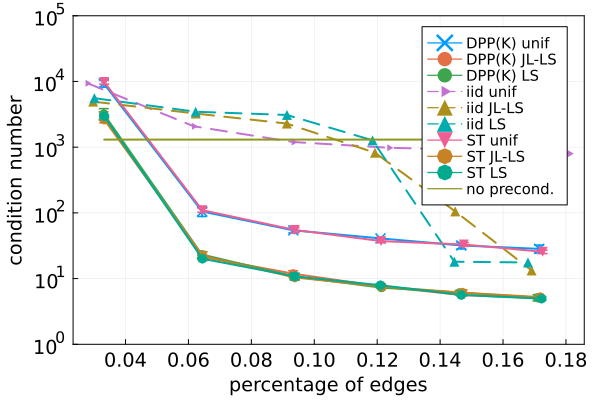

, 0.025305044967271224 + 0.024614607512681082im, 0.025303754410128484 + 0.024616466022466903im, 0.02530412524173427 + 0.024615931994092236im, 0.02530532112639509 + 0.02461420982044414im, 0.025304075289617357 + 0.024616003929223453im, 0.025305142384707963 + 0.024614467223283157im, 0.02530515802814971 + 0.02461444469557507im, 0.025304987870905626 + 0.024614689736184036im, 0.02530498462496453 + 0.024614694410760706im, 0.025305214398624487 + 0.024614363517298073im, 0.025305054491718656 + 0.024614593796554347im, 0.025305174076072516 + 0.024614421585304178im, 0.025303666276175137 + 0.024616592942777654im, 0.025305128475561933 + 0.024614487253722717im, 0.025305070580914815 + 0.02461457062679752im, 0.02530526381174302 + 0.024614292358324835im, 0.025303854949175 + 0.024616321237860676im, 0.025304949510919602 + 0.024614744977782814im, 0.025304987169131238 + 0.02461469074666243im, 0.02530368405411783 + 0.024616567341022813im, 0.02530388214710688 + 0.024616282070438533im, 0.02530377627047267 + 0.0

In [4]:
rng = Random.default_rng()

# graph parameters
c = [100 0.01 ;
0.01 20]
n = [400 ; 400]

# regularization parameter
q = 0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


In [ ]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian with random graphs

MUN graph model

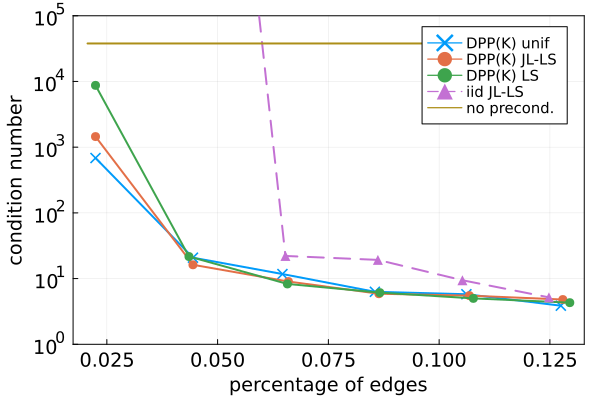

In [14]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
# B = sp_magnetic_incidence(meta_g)
# l = power_method_least_eigenvalue(B' * B)
# println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    "DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e10)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


ERO graph model

least eigenvalue: (

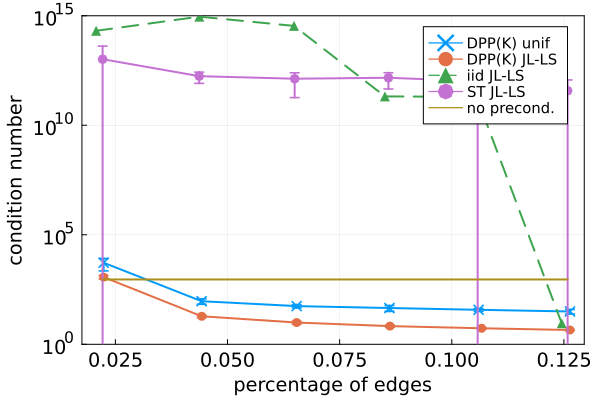

[-0.007520935888306281, 0.10010279728959345, -0.0011873575697543832, 0.09773588475819016, -0.00433747383418749, 0.08611942957253291, -0.03533320453587733, 0.05041065167427294, -0.0412078333616441, 0.09312031612654575, -0.026276250428242883, -0.07269642992085673, 0.09987641854474286, -0.04746480264409258, 0.09925004392897611, 0.011506103639215485, 0.09765558111736347, 0.0542585407522676, 0.0020040143302319314, -0.06525498810256407, 0.03312431780680096, 0.09704532683147143, 0.07642439985219888, 0.09523420494468314, 0.058894329911400936, 0.0803636157801519, 0.09837442953240867, 0.08270879457975674, 0.08400797806338343, -0.04408209881272491, -0.060326669535706284, 0.027074023807350463, 0.09971509827213847, 0.08443746733986927, -0.05512235254453277, 0.09061417252128956, 0.08085451641027937, 0.09498038172119436, -0.06992392105667751, 0.08727516334291154, 0.03904899021131792, 0.03011788621137497, 0.0203121455012335, -0.022628950280733445, 0.09993799270446449, 0.07694941518813968, -0.020108176

In [15]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalue
# B = sp_magnetic_incidence(meta_g)
# l = power_method_least_eigenvalue(B' * B)
# println("least eigenvalue: ", real.(l))

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [18]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [19]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

SystemError: SystemError: opening file "polblogs.gml": No such file or directory

In [ ]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

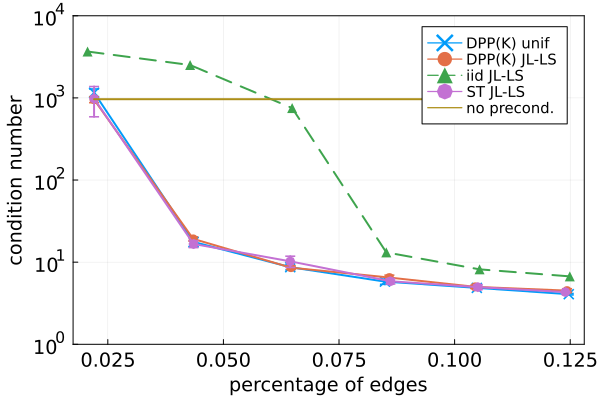

In [13]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)